In [401]:
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [402]:
plt.rcParams['figure.figsize'] = [15, 12]

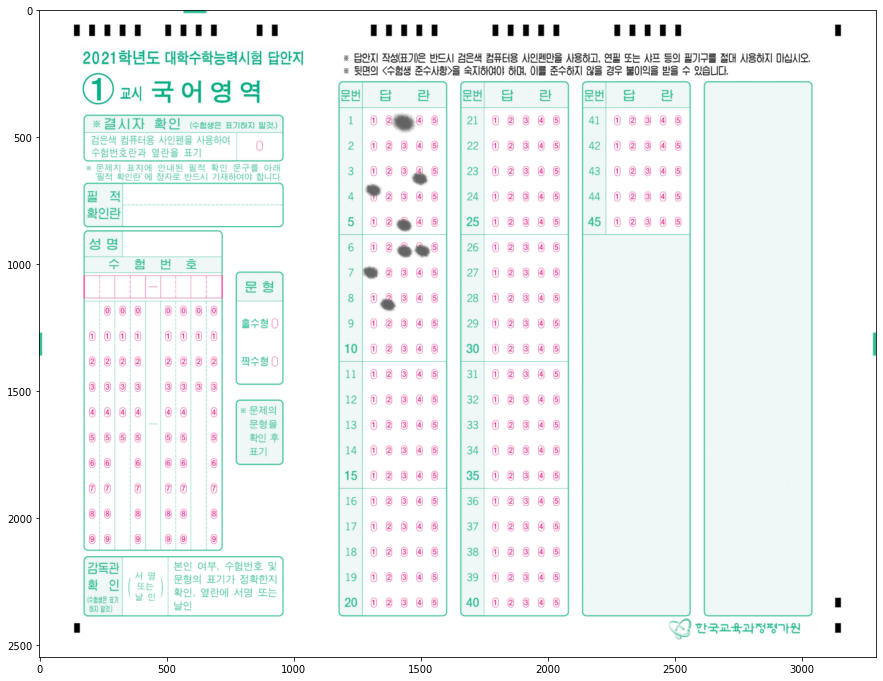

In [403]:
image = cv2.imread("국어영역_마킹.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
image = imutils.resize(image, height=1000)

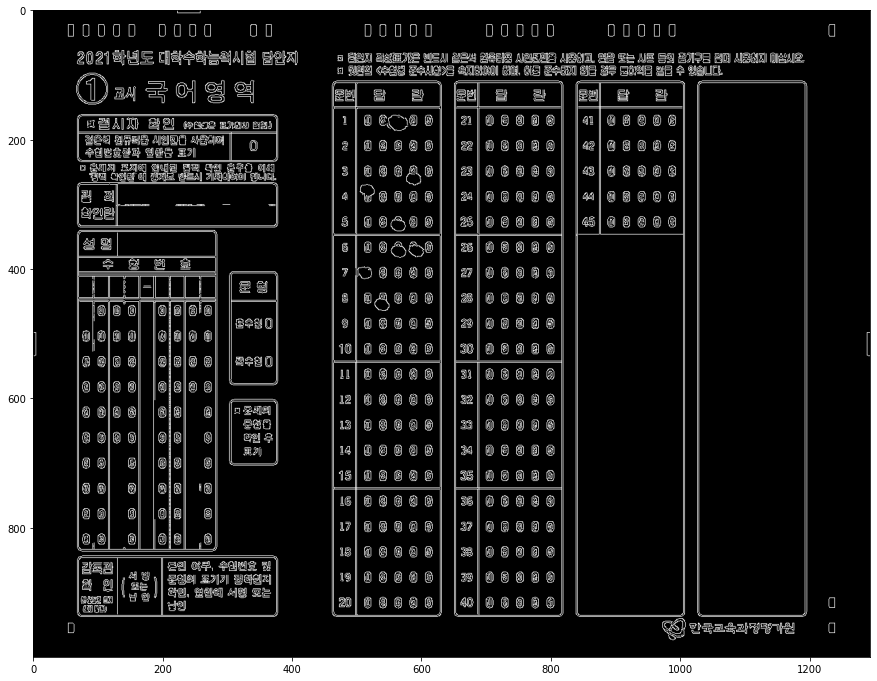

In [404]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (1, 1), 0)
edged = cv2.Canny(blurred, 50, 200, 255)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [405]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#RETR_LIST
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

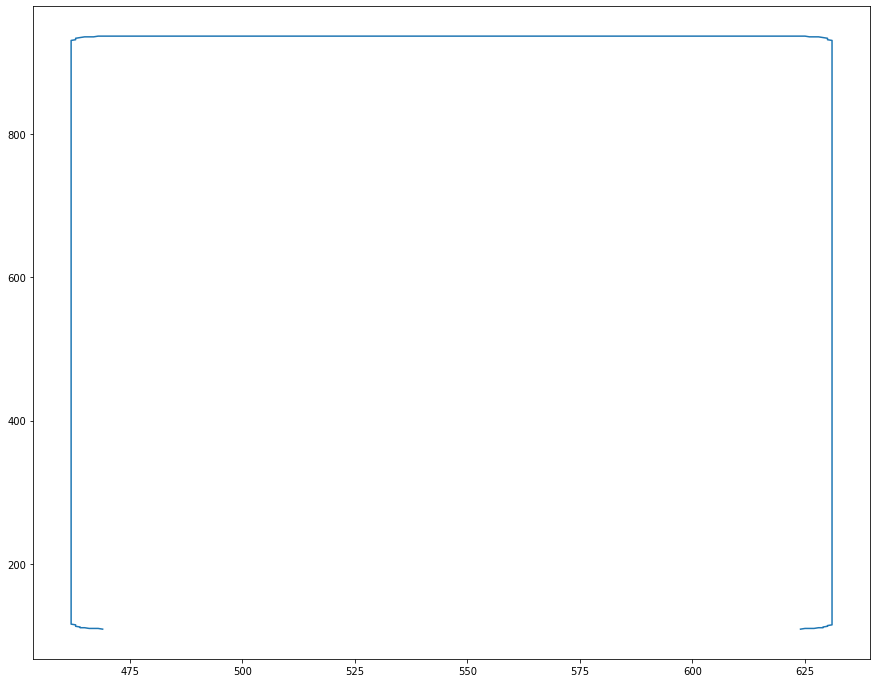

In [406]:
for i in range(1):
    c = cnts[i]
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * peri, True)
    
    x = [elem[0][0] for elem in c]
    y = [elem[0][1] for elem in c]
    plt.plot(x, y)
#    print(len(approx))
    
  #  x = [elem[0][0] for elem in approx]
   # y = [elem[0][1] for elem in approx]
    #if len(approx) == 4:
     #   plt.plot(x, y)

462 109 170 829


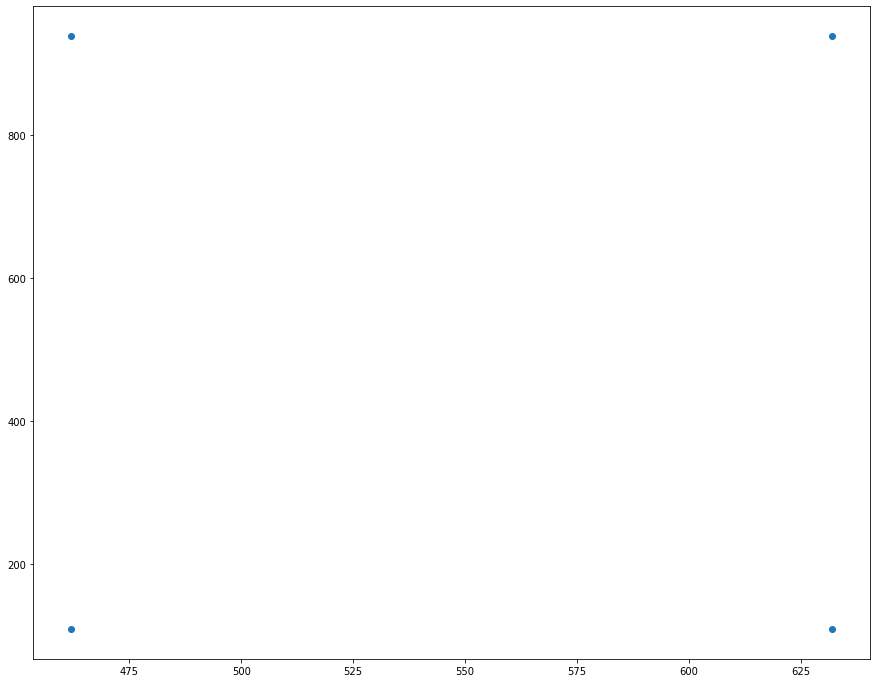

In [407]:
x, y, w, h = cv2.boundingRect(cnts[0])
print(x, y, w, h)
plt.scatter([x, x, x+w, x+w],[y, y+h, y+h, y])

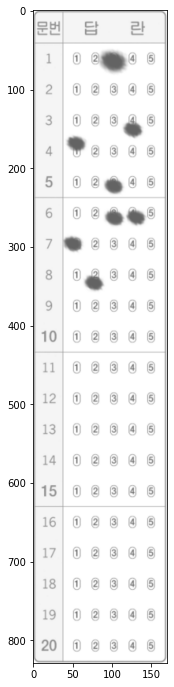

In [408]:
roi = gray[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

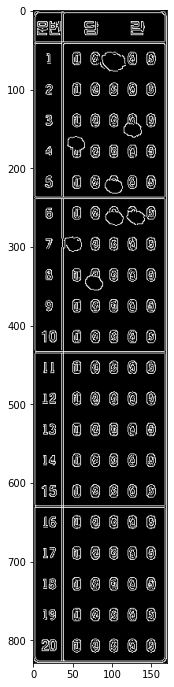

In [409]:
boxBlurred = cv2.GaussianBlur(roi, (1, 1), 0)
boxEdged = cv2.Canny(boxBlurred, 50, 200, 255)
plt.imshow(cv2.cvtColor(boxEdged, cv2.COLOR_BGR2RGB))

In [410]:
hh, ww = boxEdged.shape
boxCnts = cv2.findContours(boxEdged.copy()[int(hh*.06):int(hh*.99),(int(ww*.02)):(int(ww*.98))], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#RETR_LIST
boxCnts = imutils.grab_contours(boxCnts)

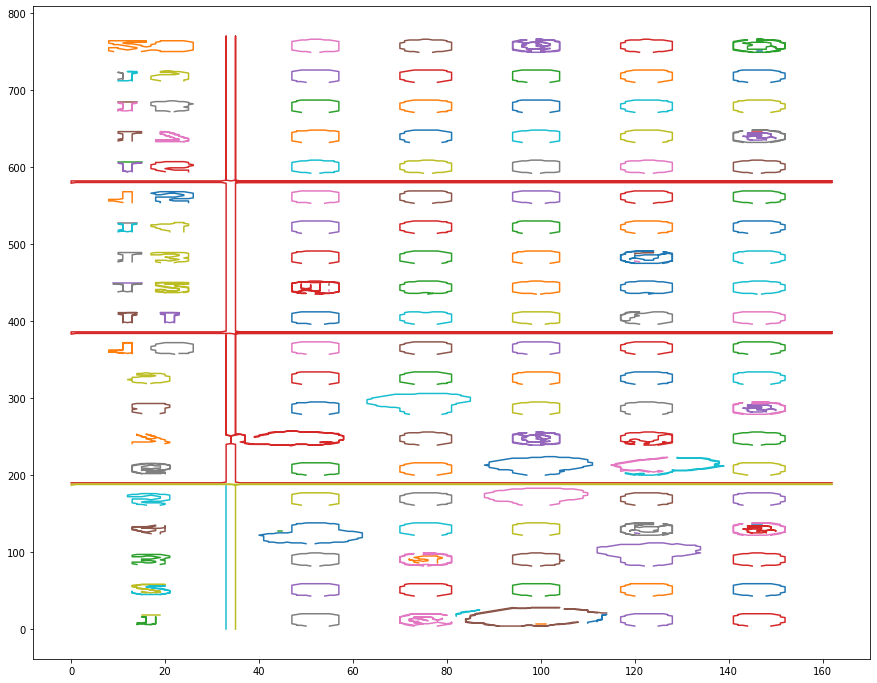

In [411]:
for c in boxCnts:
    xx= [elem[0][0] for elem in c]
    yy = [elem[0][1] for elem in c]
    plt.plot(xx, yy)

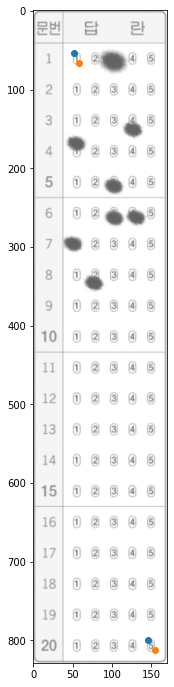

In [412]:
roi = gray[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

boundX, boundY, boundW, boundH = cv2.boundingRect(cnts[0])
xstart = boundW * .3
ystart = xstart * 1.05
xspace = boundW * .14
yspace = boundH * .0474

dw = boundX * .017
dh = dw * 1.6

answerArea = float(dw * dh)

plt.scatter([int(xstart), int(xstart + xspace * 4)],[int(ystart), int(ystart+(yspace*19))])
plt.scatter([int(xstart+dw), int(xstart + xspace * 4 +dw)],[int(ystart+dh), int(ystart+(yspace*19)+dh)])

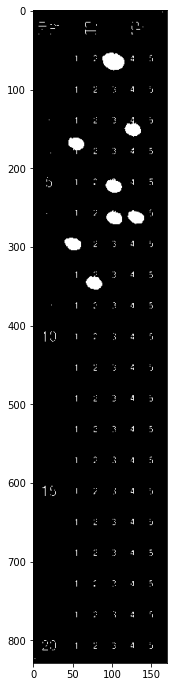

In [433]:
answerBlurred = cv2.GaussianBlur(roi, (1, 1), 0)
answerThresh = cv2.threshold(answerBlurred, 150, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(cv2.cvtColor(answerThresh, cv2.COLOR_BGR2RGB))

In [435]:
print(cv2.countNonZero(answerThresh))

3454


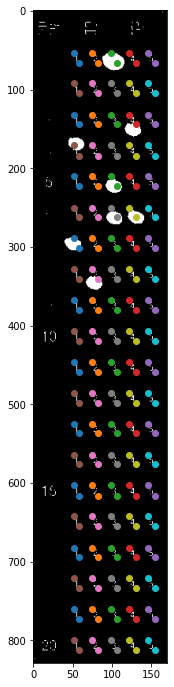

In [447]:
plt.imshow(cv2.cvtColor(answerThresh, cv2.COLOR_BGR2RGB))
ii = 0
jj = 0
prob = []
while int(ii * yspace + ystart + dh) < boundH:
    selection = []
    jj = 0
    while int(jj * xspace + xstart + dw) < boundW:
        tempROI = answerThresh[int(ii * yspace + ystart):int(ii * yspace + ystart+dh),int(jj * xspace + xstart):int(jj * xspace + xstart + dw)]
        plt.scatter([int(jj*xspace + xstart),int(jj*xspace + xstart+dw)], [int(ii * yspace + ystart),int(ii * yspace + ystart + dh)])
        total = cv2.countNonZero(tempROI)
        if total / float(answerArea) > 0.5:
            selection.append(jj)
        jj+=1
    
    prob.append(selection)
    ii+=1

In [449]:
for i, elem in enumerate(prob):
    print(i, elem)

0 [2]
1 []
2 []
3 [0]
4 [2]
5 [2, 3]
6 [0]
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 []
